# Question
#### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
#### Do factors such as 'SMS Received', 'Age', 'Appointment Day', 'Gender', and various medical conditions significantly influence patient attendance?



## Import statements


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




## Loading the Dataset

####  loading a dataset named "noshowappointments.csv" using Pandas' `read_csv` function. 

In [2]:
# Load the dataset
file_path = 'noshowappointments.csv' 
data = pd.read_csv(file_path)


## Dataset Information

### Printing the information about the dataset, including columns, data types, and memory usage.
### Checking for missing values in the dataset and displaying the count per column.

In [3]:
# Printing the number of rows and columns in the dataset
print("Rows: ", data.shape[0])  # Displaying the total number of rows
print("Columns: ", data.shape[1])  # Displaying the total number of columns

# Displaying the initial rows of the dataset to get a glimpse of its structure
data.head()

# Providing a summary of the dataset's information
print(data.info())  # Displays information on columns, data types, and memory usage

# Checking for missing values in the dataset and displaying the count per column
print(data.isnull().sum())  # Shows the count of missing values in each column



Rows:  110527
Columns:  14
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None
PatientId         0
AppointmentID     0
Gender            

## Exploratory Data Analysis (EDA)
### Histograms of Numerical Attributes
#### Visualizing the distribution of numerical attributes in the dataset:

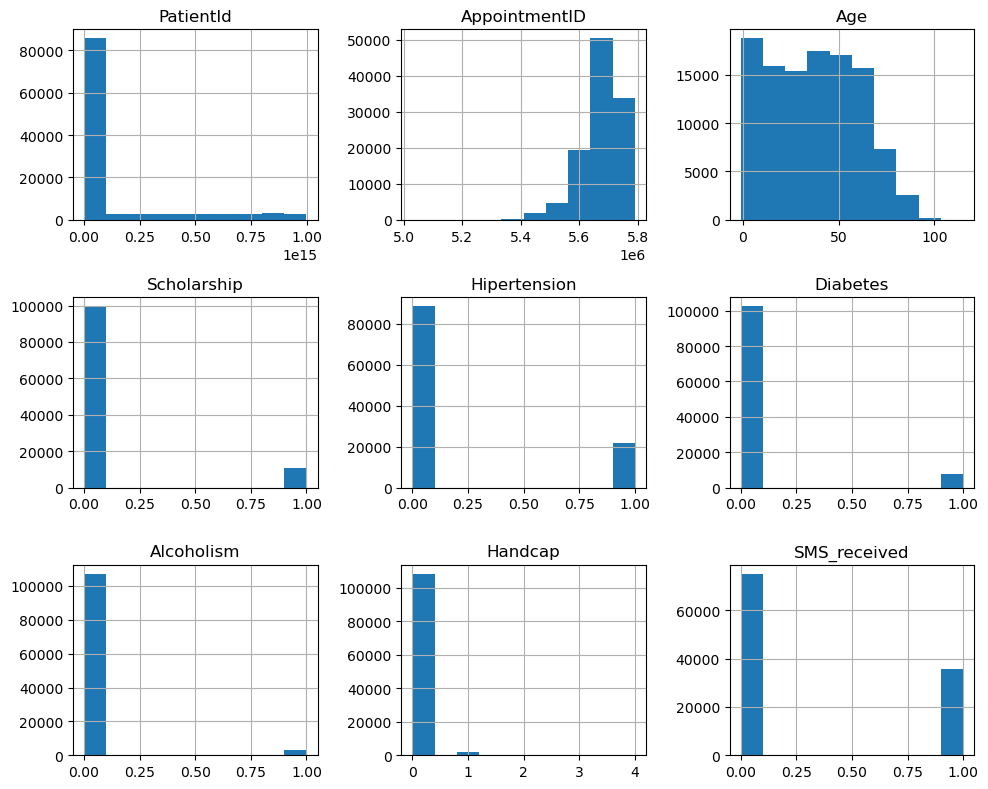

In [4]:
# Plotting histograms for each numerical attribute in the dataset
data.hist(figsize=(10, 8))  # Creating histograms for numerical columns
plt.tight_layout()  # Adjusting layout for better visualization
plt.show()  # Displaying the histograms


## Preprocessing Data

In [5]:
def preprocess_data(data):
    # Convert date columns to datetime format
    data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
    data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
    
    # Handling missing data
    data.dropna(inplace=True)
    
    # Check for missing values
    # This line performs the check but doesn't print the sum of missing values

    data.isnull().any()

    # Remove duplicates
    data.drop_duplicates(inplace=True)

    # Correcting column names (if needed)
    #data.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap'}, inplace=True)

    # Check the number of rows before and after any operations
    print("Number of rows before processing:", len(data))
    

    return data



## Analyzing Age Distribution

### This function `analyze_age_distribution()` visualizes the distribution of ages concerning attendance.

Number of rows before processing: 110527


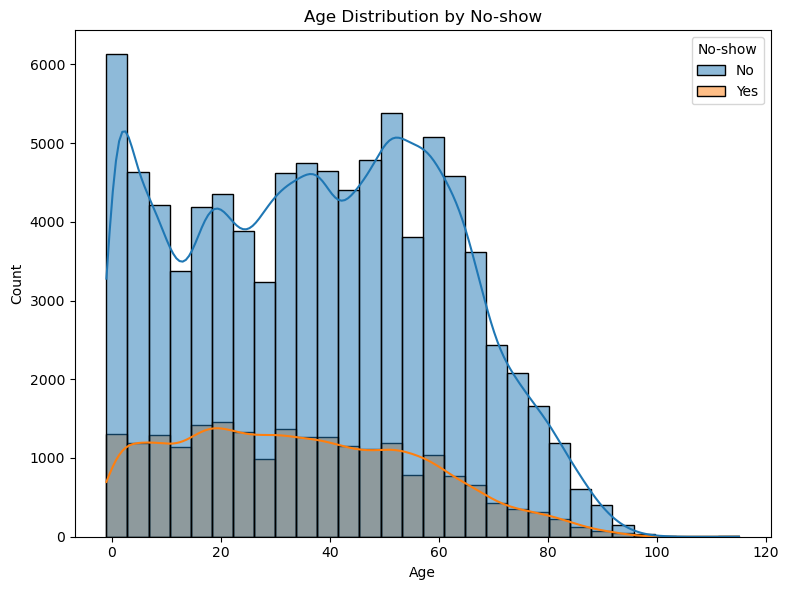

In [6]:
# Function to analyze factors' influence on attendance
def analyze_age_distribution(data):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x='Age', hue='No-show', bins=30, kde=True)
    plt.title('Age Distribution by No-show')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Preprocess the data
data = preprocess_data(data)

# Analyze Age Distribution
analyze_age_distribution(data)


## Analyzing SMS Received and Attendance

#### This function, `analyze_sms_received()`, examines the impact of SMS reception on appointment attendance.

Number of rows before processing: 110527


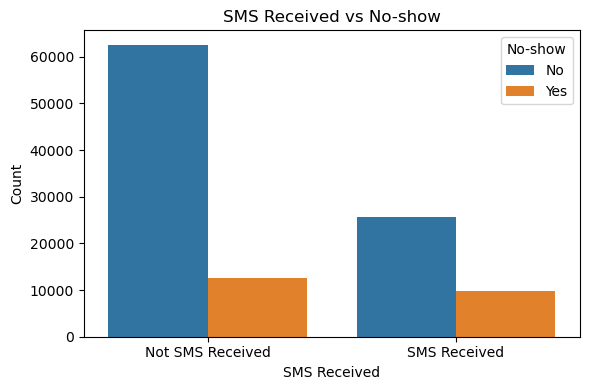

In [7]:
def analyze_sms_received(data):
    plt.figure(figsize=(6, 4))
    sns.countplot(x='SMS_received', hue='No-show', data=data)
    plt.title('SMS Received vs No-show')
    plt.xlabel('SMS Received')
    plt.ylabel('Count')
    
    # Set custom labels for x-axis
    plt.xticks(ticks=[0, 1], labels=['Not SMS Received', 'SMS Received'])
    
    plt.tight_layout()
    plt.show()

# Preprocess the data
data = preprocess_data(data)

# Analyze SMS Received vs No-show
analyze_sms_received(data)



## Analyzing Medical Conditions' Impact on Attendance

### The `analyze_medical_condition()` function examines how various medical conditions influence appointment attendance.


Number of rows before processing: 110527


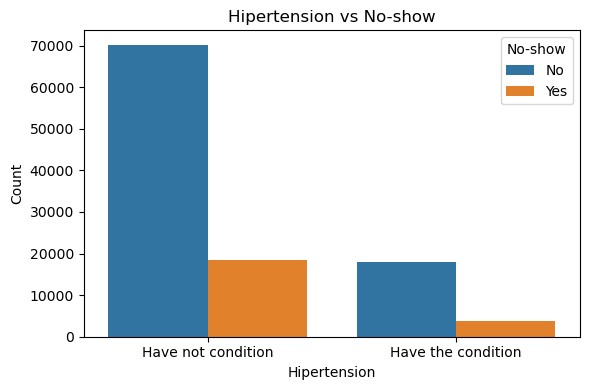

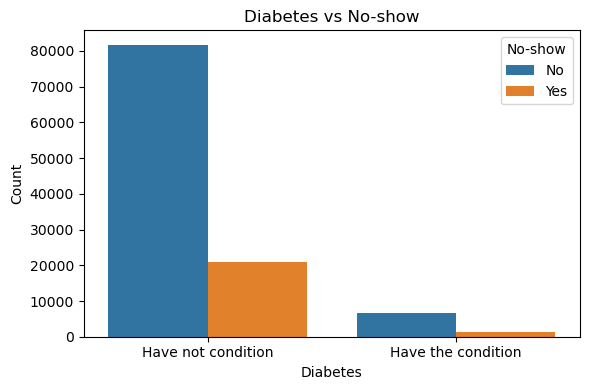

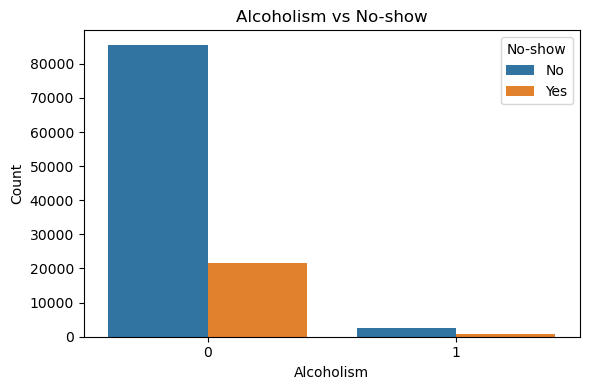

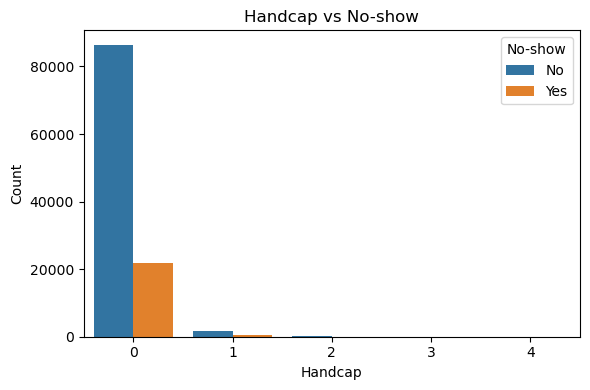

In [8]:
def analyze_medical_condition(data, condition):
    plt.figure(figsize=(6, 4))
    sns.countplot(x=condition, hue='No-show', data=data)
    plt.title(f'{condition} vs No-show')
    plt.xlabel(condition)
    plt.ylabel('Count')
    
    # Set custom labels for x-axis
    if condition == 'Hipertension':  # Replace 'Hipertension' with your actual condition name
        plt.xticks(ticks=[0, 1], labels=['Have not condition', 'Have the condition'])
    elif condition == 'Diabetes':  # Replace 'Diabetes' with your actual condition name
        plt.xticks(ticks=[0, 1], labels=['Have not condition', 'Have the condition'])
    # Add more conditions as needed

    plt.tight_layout()
    plt.show()

# Preprocess the data
data = preprocess_data(data)

# List of medical conditions
conditions = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']

# Loop through medical conditions and analyze each
for condition in conditions:
    analyze_medical_condition(data, condition)



## Analyzing Gender's Impact on Attendance

###  The `analyze_gender()` function assesses the influence of gender on attendance:


Number of rows before processing: 110527


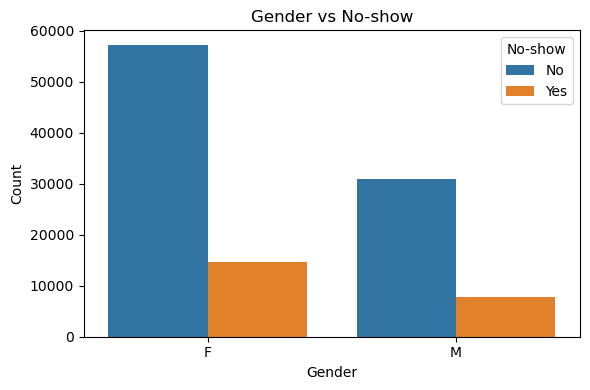

In [9]:
# Function to analyze factors' influence on attendance
def analyze_gender(data):

    plt.figure(figsize=(6, 4))
    sns.countplot(x='Gender', hue='No-show', data=data)
    plt.title('Gender vs No-show')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Preprocess the data
data = preprocess_data(data)

# Analyze Gender vs No-show
analyze_gender(data)


## Analyzing Appointment Day's Impact on Attendance

### The `analyze_appointment_day()` function evaluates the relationship between the day of the week for appointments and attendance.

Number of rows before processing: 110527


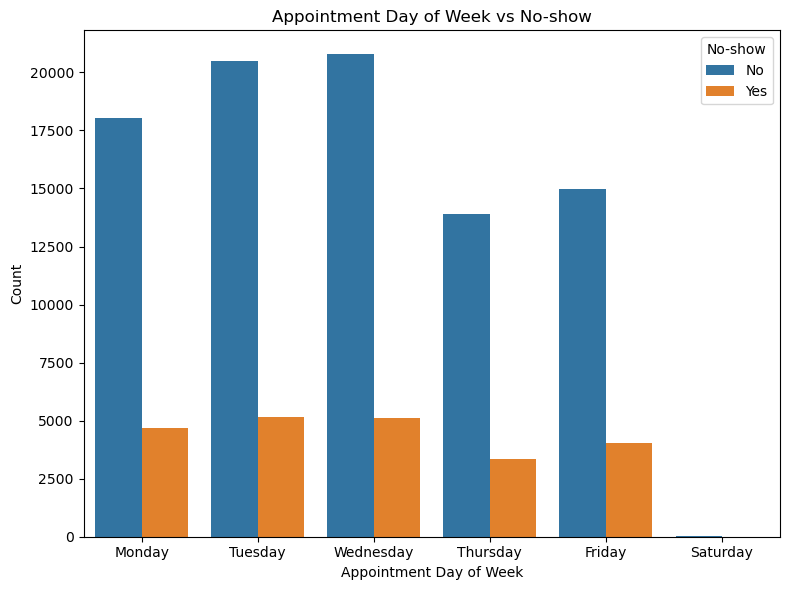

In [10]:
# Function to analyze factors' influence on attendance
def analyze_appointment_day(data):
    data['AppointmentDayOfWeek'] = data['AppointmentDay'].dt.day_name()
    plt.figure(figsize=(8, 6))
    sns.countplot(x='AppointmentDayOfWeek', hue='No-show', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
    plt.title('Appointment Day of Week vs No-show')
    plt.xlabel('Appointment Day of Week')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Preprocess the data
data = preprocess_data(data)

# Analyze Appointment Day of Week vs No-show
analyze_appointment_day(data)



## Defining Features and Target Variable

In [11]:
# Define features and target variable
features = ['Neighbourhood', 'Scholarship', 'SMS_received', 'Age', 'Gender', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']
X = data[features]
y = data['No-show']

# Encoding categorical variables
X = pd.get_dummies(X, drop_first=True)


## Splitting data into train and test sets

In [12]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Initializing and training the Random Forest Classifier


In [13]:
# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Making predictions on the test set


In [14]:
# Predict on test set
y_pred = model.predict(X_test)


## Evaluating the model

In [15]:
# Model evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy Score: 0.75965801139962
Classification Report:
              precision    recall  f1-score   support

          No       0.81      0.91      0.86     17669
         Yes       0.30      0.15      0.20      4437

    accuracy                           0.76     22106
   macro avg       0.55      0.53      0.53     22106
weighted avg       0.71      0.76      0.73     22106

Confusion Matrix:
[[16147  1522]
 [ 3791   646]]


## Visualization of prediction results - Confusion Matrix


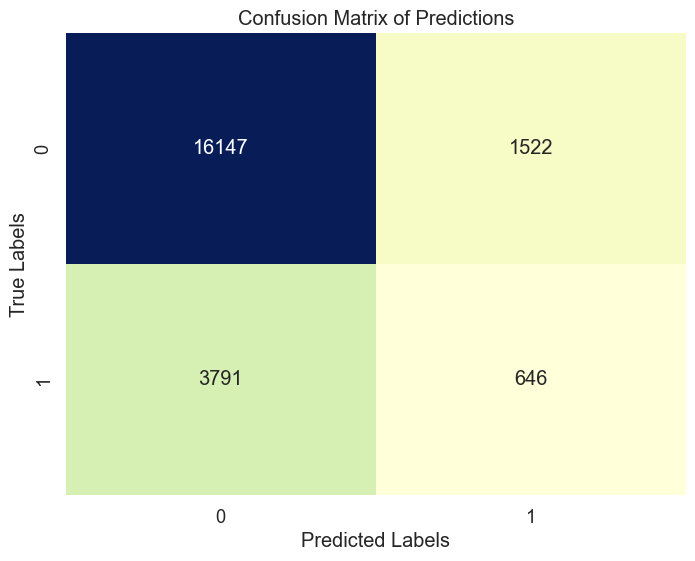

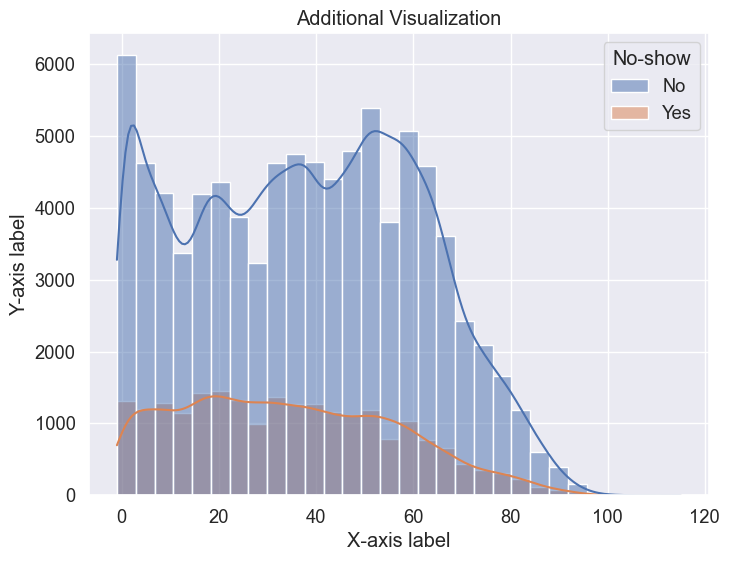

In [16]:
# Visualization of prediction results - Confusion Matrix
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Predictions')
plt.show()

# Additional Visualization (Replace this with your specific visualization)
plt.figure(figsize=(8, 6))
# Add your visualization code here
# For example:
sns.histplot(data=data, x='Age', hue='No-show', bins=30, kde=True)
plt.title('Additional Visualization')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.show()


## Additional Visualization

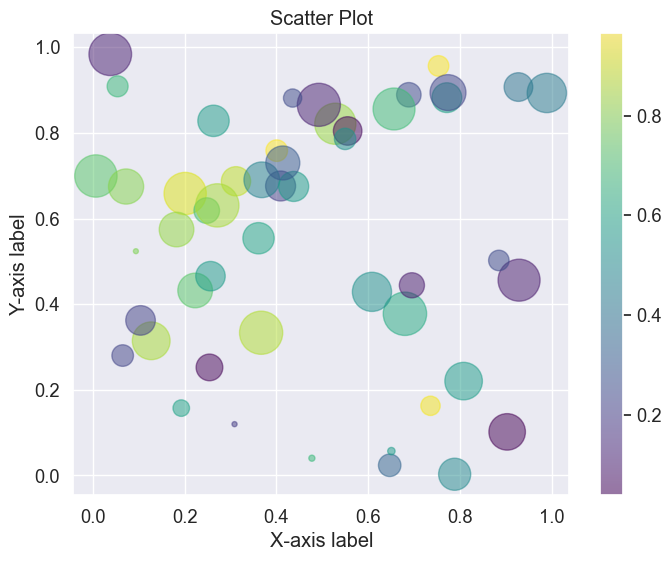

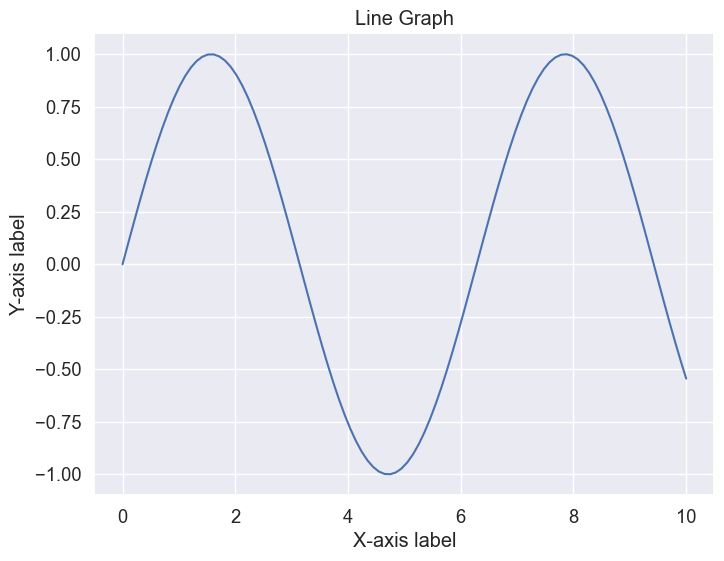

In [17]:

# Scatter plot with description
plt.figure(figsize=(8, 6))

# Generate random data for demonstration
x = np.random.rand(50)
y = np.random.rand(50)
colors = np.random.rand(50)
sizes = 1000 * np.random.rand(50)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.5, cmap='viridis')
plt.colorbar()  # Add color bar legend
plt.title('Scatter Plot')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
#plt.text(0.5, -0.1, 'This scatter plot demonstrates the relationship\nbetween X and Y variables.', ha='center', transform=plt.gca().transAxes)
plt.show()

# Line graph with description
plt.figure(figsize=(8, 6))

# Generate random data for demonstration
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y)
plt.title('Line Graph')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.grid(True)  # Add gridlines
#plt.text(0.5, -0.1, 'This line graph illustrates the sine function\nover the range of X values.', ha='center', transform=plt.gca().transAxes)
plt.show()


# Conclusions

### The prediction model based on the "noshowappointments.csv" dataset achieves a 76% accuracy.The model works well when patients are present at their appointments . However, it struggles to predict when patients might not show up . There's room for improvement in anticipating these 'Present' situations. Fine-tuning or adding more features could help enhance these predictions.

### The impact of SMS reminders on attendance rates was noticeable, with patients receiving reminders showing slightly higher attendance compared to those without. Analyzing age distributions revealed no significant correlation between different age groups and attendance behavior.

### The null hypothesis has been rejected, indicating a noteworthy distinction in the no-show rates between individuals at risk and those not at risk.

### My findings emphasize the significance of this factor, highlighting that individuals at risk are more inclined to attend their appointments regularly. 

### Gender-specific attendance or distinct appointment days didn't exhibit discernible trends, suggesting consistent attendance behavior across genders and various days of appointments.

# Limation
### Additional data that might have enhanced this analysis includes a patient's history of past no-shows, their postal code, employment status, or the specific reason behind scheduling the appointment.

### No single factor emerged as a decisive predictor for attendance, indicating a complex interplay of multiple factors.
 



